## Analyse textuelle du débat sur l'Article 9

In [95]:
#coding: utf-8
#importing modules
#lecture des json
import json
#text-minig
import re
#viz
import matplotlib
import matplotlib.pyplot as plt
#calcul
import numpy as np
from itertools import combinations
%matplotlib inline

## Article 9: version originale

Les valeurs sont stockées dans un fichier en ```json``` nous allons les stocker dans la variable ```article9```

In [96]:
def load_vo(art_file = "./article_9.json"):
    with open(art_file, "r") as f:
        article9 = json.load(f)
    return article9
article9 = load_vo()


### ** Découverte de l'article9**

In [97]:
# toutes les clés du dictionnaire de l'article9
print("Clés de l'ARTICLE 9:")
for clé, valeur in list(article9.items()):
    print("-"+clé, type(valeur))

Clés de l'ARTICLE 9:
-sources <class 'list'>
-ranking <class 'NoneType'>
-votes_ok <class 'int'>
-body_links <class 'list'>
-body <class 'str'>
-versions_count <class 'int'>
-sources_count <class 'int'>
-cat_id <class 'int'>
-votes_nok <class 'int'>
-updated_at <class 'str'>
-arguments_count <class 'int'>
-article_link <class 'str'>
-votes_mitige <class 'int'>
-body_anchors <class 'list'>
-answer <class 'dict'>
-title <class 'str'>
-author <class 'str'>
-subtitle <class 'str'>
-arguments <class 'list'>
-versions <class 'list'>
-article_id <class 'int'>
-created_at <class 'str'>
-votes_total <class 'int'>


L'article9 stocke à la fois les informations contextuelles sur l'article dans sa version originale mais encore
tous les **arguments**, les **sources** et toutes les **versions** de cet article.
On note que les **votes** sont pour le moment dans un fichier à part.

Nous allons garder de coté les **arguments**, **sources** et **versions** pour les manipuler 

**NB** 
##### Vocabulaire utilisé
entre le nom de variables, la dénomination technique et les concepts manipulés on note des différences
* votes: exprimé en pour contre mitigé ok nok
* versions / amendements
* arguments ok nok pour contre
* sources
De même que la notation informatique commence à 0 et non à 1.

In [98]:
#on stocke les informations dans des variables simples
versions = article9["versions"] #toutes les versions sans la version originale
arguments = article9["arguments"] #tous les arguments (version orginale+ versions complémentaires??? a verifier)
sources = article9["sources"] #toutes les sources


## Amendements de l'article 9

Ici nous allons nous concentrer sur les différentes amendements (versions) de l'article 
ainsi que les **explications** qui justifient ces modifications (commentaires des versions)

La structure du fichier stocke à la fois les informations contextuelles de l'article original et les amendements
que nous avons volontairement stocké les amendements (versions complémentaires) dans une variables **```versions```** à oart

Nous n'alons retenir que ce qui nous intéresse de la version originale de l'article.


### Découverte des amendements

*pour l'exemple nous allons prendre le premier amendement de l'article 9 (soit V1)*


In [99]:
v1 = versions[0]
print("Les informations pour une version")
for clé, valeur in v1.items():
    print("-"+clé, type(valeur))

Les informations pour une version
-link <class 'str'>
-arguments_yes_count <class 'int'>
-votes_nok <class 'int'>
-votes_mitige <class 'int'>
-before <class 'str'>
-slug <class 'str'>
-id <class 'int'>
-votes_total <class 'int'>
-title <class 'str'>
-author <class 'str'>
-after <class 'str'>
-arguments_count <class 'int'>
-article_id <class 'int'>
-arguments_no_count <class 'int'>
-created_at <class 'str'>
-comment <class 'str'>
-updated_at <class 'str'>


Les valeurs qui vont nous intéresser dans un premier temps vont être:
* le titre: la version originale porte le nom générique de l'article dans ```title``` tandis que les amendements (versions ) complémentaires sont identifiées par un ```slug``` (soit un racourci: un titre séparé par des tirets présents dans l'url)
* l'explication/ justification de la modification (```comment```)
* date de création (```started_at```)
* auteur (```author```)

#### combien d'amendements?


In [100]:
print(len(versions), "amendements + 1 version originale")  


108 amendements + 1 version originale


#### Comparaison avec la version originale

La structure du fichier stocke à la fois les informations contextuelles de l'article original et les amendements
que nous avons volontairement stocké les amendements (versions complémentaires) dans une variables ```versions```
Nous n'alons retenir que ce qui nous intéresse de la version originale de l'article.

Pour rappel:

In [101]:

print("Toutes les informations de l'article9")
for clé, valeur in article9.items():
    print("-"+clé, type(valeur))

Toutes les informations de l'article9
-sources <class 'list'>
-ranking <class 'NoneType'>
-votes_ok <class 'int'>
-body_links <class 'list'>
-body <class 'str'>
-versions_count <class 'int'>
-sources_count <class 'int'>
-cat_id <class 'int'>
-votes_nok <class 'int'>
-updated_at <class 'str'>
-arguments_count <class 'int'>
-article_link <class 'str'>
-votes_mitige <class 'int'>
-body_anchors <class 'list'>
-answer <class 'dict'>
-title <class 'str'>
-author <class 'str'>
-subtitle <class 'str'>
-arguments <class 'list'>
-versions <class 'list'>
-article_id <class 'int'>
-created_at <class 'str'>
-votes_total <class 'int'>


Nous pouvons voir donc que seules certaines valeurs sont intéressantes pour les comparer aux autres amendements (versions)

### Formater la version originale comme un amendement


Nous allons dans un premier temps formater la version originale de la même manière que les amendements (versions complémentaires) avec les mêmes informations disponibles dans chaque amendement(version).

La version originale avec les informations qui nous intéressent sont stockées sous forme de dictionnaire (de la même manière que les autres amendements)

En sachant que :
* la version originale n'a pas d'explication ('```commentaire```') mais une explication de l'article (```body```)
* le titre complet n'est pas stocké dans la version originale on se servira dans un premier temps du ```subtitle``` pour la VO et des ```slugs``` pour les v(n)
* les votes mitigés ne sont pas comptabilisés
* la répartition des votes pour les arguments entre ok et nok n'est pas disponible



In [102]:
v0 = {"link": article9["article_link"], 
      "title": article9["subtitle"], 
      "before": article9["body"],  
      "after": article9["body"], 
      "comment": article9["body"], 
      "votes_ok": article9["votes_ok"],
      "votes_nok": article9["votes_nok"],
      "votes_mitige": article9["votes_total"] - (article9["votes_ok"]+article9["votes_nok"]),
      "votes_total": article9["votes_total"], 
      "created_at": article9["created_at"],
      "udpated_at": article9["updated_at"],
      "author": "gouvernement",
      "id": article9["article_id"],
      "arguments_count": article9["arguments_count"],
      #manque 
      #arguments_yes_count
      #arguments_no_count
     }

### Rapatrier la version originale dans les amendements

Nous allons donc rappatrier **v0** (notre version originale) dans notre variable **versions** qui est une *liste*.

La variable version est une liste ordonnée qui respecte l'ordre de stockage inital des versions:
nous allons donc insérer en position 0 la version originale.

In [103]:
versions.insert(0, v0)


In [104]:
print(versions[0])

{'title': 'Travaux de recherche et de statistique', 'votes_mitige': 282, 'votes_ok': 1320, 'before': 'Au chapitre 3 du titre 3 du livre V du code de la recherche, il est inséré un article L. 533-4 ainsi rédigé\xa0:«Art. L. 533-4 –I. Lorsque un écrit scientifique, issu d’une activité de recherche financée au moins pour moitié par des fonds publics, est publié dans un périodique, un ouvrage paraissant au moins une fois par an, des actes de congrès ou de colloques ou des recueils de mélanges, son auteur, même en cas de cession exclusive à un éditeur, dispose du droit de mettre à disposition gratuitement sous une forme numérique, sous réserve des droits des éventuels coauteurs, la dernière version acceptée de son manuscrit par son éditeur et à l’exclusion du travail de mise en forme qui incombe à ce dernier, au terme d’un délai de douze mois pour les sciences, la technique et la médecine et de vingt-quatre mois pour les sciences humaines et sociales, à compter de date de la première public

In [105]:
print(versions[1])

{'link': 'http://www.republique-numerique.fr/projects/projet-de-loi-numerique/consultation/consultation/opinions/section-2-travaux-de-recherche-et-de-statistique/article-9-acces-aux-travaux-de-la-recherche-financee-par-des-fonds-publics/versions/mise-a-disposition-systematique-des-resultats-de-la-recherche-financee-par-des-fonds-publics', 'arguments_yes_count': 4, 'votes_nok': 29, 'votes_mitige': 1, 'before': '', 'slug': 'mise-a-disposition-systematique-des-resultats-de-la-recherche-financee-par-des-fonds-publics', 'id': 181, 'votes_total': 66, 'title': 'Création du nouvel article L 533-4 du code de la recherche (Livre V, Titre III, Chapitre 3)', 'author': 'philippegambette', 'after': 'I. Lorsque un écrit scientifique, issu d’une activité de recherche financée au moins pour moitié par des fonds publics est publié dans un périodique, un ouvrage paraissant au moins une fois par an, des actes de congrès ou de colloques ou des recueils de mélanges,son auteur, même en cas de cession exclusi

* ** Combien de versions?**:

In [107]:
print(len(versions),"versions")

109 versions


* **Ordonner les versions par date**

Si la v0 est bien la version originale, tachons d'ordonner les versions par ordre chronologique

In [108]:
versions = sorted(versions, key=lambda v: v["created_at"])
print("V0:", versions[0]["created_at"], "V1:", versions[-1]["created_at"])

V0: 2015-09-26T02:27:57+0200 V1: 2015-10-18T21:15:23+0200


* **Combien de votes et d'arguments par version?**

In [109]:
print ("version  |date\t\t\t    |votes nb\t|arguments nb\t| auteur")
print("---------------------------------------------------------------------")
for i,v in enumerate(versions):
    print ("version_"+str(i)+"|", v["created_at"],"|", v["votes_total"], "\t|", v["arguments_count"], "\t\t|", v["author"])

version  |date			    |votes nb	|arguments nb	| auteur
---------------------------------------------------------------------
version_0| 2015-09-26T02:27:57+0200 | 3334 	| 132 		| gouvernement
version_1| 2015-09-26T11:43:24+0200 | 24 	| 4 		| jeanbaptistesoufron
version_2| 2015-09-26T11:49:47+0200 | 69 	| 13 		| cellular1988
version_3| 2015-09-26T13:04:01+0200 | 22 	| 2 		| annelaureroux
version_4| 2015-09-26T14:11:03+0200 | 4 	| 2 		| hayekvalerie
version_5| 2015-09-26T15:03:11+0200 | 31 	| 4 		| solarus
version_6| 2015-09-26T16:15:43+0200 | 123 	| 5 		| benoitrkloeckner
version_7| 2015-09-26T21:17:13+0200 | 33 	| 0 		| oliviermauco
version_8| 2015-09-26T23:16:53+0200 | 66 	| 9 		| philippegambette
version_9| 2015-09-27T08:34:33+0200 | 41 	| 13 		| laurentliegeois
version_10| 2015-09-27T12:04:30+0200 | 87 	| 7 		| danielbourrion
version_11| 2015-09-28T10:29:48+0200 | 4 	| 1 		| cbernault
version_12| 2015-09-28T10:30:59+0200 | 27 	| 6 		| cbernault
version_13| 2015-09-28T11:02:16+0200 | 

Ecrivons les données qui nous intéressent dans un **fichier** qui nous servira de référentiel
ici une version minimale à savoir
* le numero de version **```version_nb```**
* le titre: la version originale porte le nom générique de l'article dans title tandis que les amendements (versions) complémentaires sont identifiées par un slug (soit un racourci: un titre séparé par des tirets présents dans l'url) **```title```**
* la modification opérée dans chaque version
* l'explication/ justification de la modification **```comment```**
* la date de création **```date```** que nous allons rendre zoulie
* l'auteur **```author```**
* le nombre de votes **```nb_votes```**
* le nombre d'arguments **```nb_args```**

**Attention!**
Entre la version originale et les amendements quelques changements ont déjà été notés:
* title => slug dans les VS


In [142]:
amendements = {}
entete = ["version_nb", "title", "comment","modification", "date", "author", "nb_votes", "nb_args"]
with open("amendements.csv", "w") as f:
    f.write("\t".join(entete)+'\n')
    for i,v in enumerate(versions):
        version_nb = "v_"+str(i)
        if i == 0:
            title = v["title"]
        else:
            title = str(v["slug"]).replace("-", " ")
            
        
        comment = str(v["comment"])
        #print(comment)
        modification = v["before"]
        date = v["created_at"].replace("T", " ").split("+")[0]
        #print(date)
        author = v["author"]
        nb_votes = str(v["votes_total"])
        nb_args = str(v["arguments_count"])
        ligne = [version_nb, title, comment,modification, date, author, nb_votes, nb_args]
        f.write("\t".join(ligne)+'\n')
        amendements[i] = {"title": title,"comment": comment, "date":date, "author":author, "nb_votes":nb_votes,  "nb_args":nb_args}

#### Ajout/ suppression dans le texte original
Nous allons ici vérifier les modifications opérées par chaque ammendements à l'article originel

* Y-a-t-il eu beaucoup de modification du texte original? 
* Combien de mots ajoutés retirés par rapport de la version originale ?
* Combien de mots au total de la version initiale à la version finale?


In [138]:
for i, v in enumerate(versions):
    print( "v"+str(i), (set(v["after"].split(" ")) - set(v["before"].split(" ")) - set(versions[0]["comment"].split(" "))))
    #print( "v"+str(i), (set(v["after"].split(" "))  - set(versions[0]["comment"].split(" "))))

v0 set()
v1 {'co-auteurs,', 'publics', 'dudroit', 'I.', 'commerciale.«', '»', 'cours.', 'II.', 'mélanges,son'}
v2 {'co-auteurs,', 'publics', 'dudroit', 'I.', 'commerciale.«', '»', 'cours.', 'II.', 'mélanges,son'}
v3 {'co-auteurs,', 'publics', 'dudroit', 'I.', 'commerciale.«', '»', 'cours.', 'II.', 'mélanges,son'}
v4 {'co-auteurs,', 'publics', 'dudroit', 'I.', 'commerciale.«', '»', 'cours.', 'II.', 'mélanges,son'}
v5 {'co-auteurs,', 'publics', 'dudroit', 'I.', 'commerciale.«', '»', 'cours.', 'II.', 'mélanges,son'}
v6 {'co-auteurs,', 'publics', 'dudroit', 'I.', 'commerciale.«', '»', 'cours.', 'II.', 'mélanges,son'}
v7 {'co-auteurs,', 'publics', 'dudroit', 'I.', 'commerciale.«', '»', 'cours.', 'II.', 'mélanges,son'}
v8 {'co-auteurs,', 'publics', 'dudroit', 'I.', 'commerciale.«', '»', 'cours.', 'II.', 'mélanges,son'}
v9 {'co-auteurs,', 'publics', 'dudroit', 'I.', 'commerciale.«', '»', 'cours.', 'II.', 'mélanges,son'}
v10 {'co-auteurs,', 'publics', 'dudroit', 'I.', 'commerciale.«', '»', 'co

**PROBLEME** On ne voit pas les changements opérés dans le texte de chaque versions

#### Les commentaires des versions

Faute d'information sur les modifications apportées au texte de loi
Il s'agira de plonger dans le détail des *titres*
puis des *commentaires justificatifs* apportés par chaque auteur

et regarder les mots communs et différents à chaque versions
* Combien de mots en commun de version a version0
* Combien de mots différents de version a version0
* Quels sont les mots les plus utilisés?




### Identifier les mots clés 

Nous allons donc regarder les titres des ammendements proposés comme des modifications apportées texte original.

Nous avons besoin d'une fonction qui transforme un texte en une liste de mots à travers une opération qu'on appelle **chunking**
i.e découper le texte en petit bout. Ici on va découper les mots simplement en utilisant le caractère distinctif de l'espace ou de la ponctuation.
Un mot est donc ici défini comme une suite de lettres ou de chiffres séparés par un espace, ou un point de ponctuation.
Créons notre fonction **get_words** 
qui nous servira à multiples reprises: elle prend en entrée un texte (n'importe lequel l'avantage de créer une fonction) et renvoie une liste de mots


In [139]:
def get_words(text):
    #on se sert du module regex trèèèèèès puissant
    #avec une notation propre W
    #tout ce qui est un espace et tout ce qui n'est pas une lettre
    words = re.split('\W', text)
    #print(words)
    return words
    

In [134]:
#test
get_words("La vie n'est pas un long fleuve tranquille")

['La', 'vie', 'n', 'est', 'pas', 'un', 'long', 'fleuve', 'tranquille']

Nous avons une variable amendements nous allons nous en servir
* **Analyse des titres **

In [158]:
from collections import Counter
title_words = []
for a in amendements.values():
    title_words.extend(get_words(a["title"]))
top_100 = Counter(title_words).most_common(100)
for i, w in enumerate(top_100):
    print ("top"+str(i+1), "\t|", w[0], "\t\t\t|", w[1], "fois")

top1 	| de 		| 67 fois
top2 	| la 		| 42 fois
top3 	| et 		| 36 fois
top4 	| les 		| 34 fois
top5 	| d 		| 32 fois
top6 	| des 		| 30 fois
top7 	| le 		| 29 fois
top8 	| l 		| 27 fois
top9 	| a 		| 24 fois
top10 	| une 		| 21 fois
top11 	| pas 		| 21 fois
top12 	| embargo 		| 20 fois
top13 	| pour 		| 19 fois
top14 	| acces 		| 19 fois
top15 	| recherche 		| 18 fois
top16 	| en 		| 14 fois
top17 	| libre 		| 14 fois
top18 	| ne 		| 13 fois
top19 	| du 		| 13 fois
top20 	| scientifiques 		| 12 fois
top21 	| aux 		| 12 fois
top22 	| delai 		| 11 fois
top23 	| scientifique 		| 10 fois
top24 	| au 		| 10 fois
top25 	| plus 		| 10 fois
top26 	| duree 		| 9 fois
top27 	| dans 		| 9 fois
top28 	| mois 		| 9 fois
top29 	| donnees 		| 8 fois
top30 	| publications 		| 7 fois
top31 	| sur 		| 7 fois
top32 	| tdm 		| 7 fois
top33 	| public 		| 7 fois
top34 	| par 		| 7 fois
top35 	| un 		| 7 fois
top36 	| ouverte 		| 6 fois
top37 	| publics 		| 6 fois
top38 	| mise 		| 6 fois
top39 	| delais 		| 6

* **Transformons les titres des version 0 et la version 109 en liste de mots**

Le titre de la version transformé est stocké dans ```'title'```

In [136]:
#print (versions[0]["after"])
#la premiere
motsv0 = get_words(versions[0]["title"])
print(motsv0)
#la derniere
motsv108 = get_words(versions[-1]["slug"])
print(motsv108)



['Travaux', 'de', 'recherche', 'et', 'de', 'statistique']
['Création', 'du', 'nouvel', 'article', 'L', '533', '4', 'du', 'code', 'de', 'la', 'recherche', '', 'Livre', 'V', '', 'Titre', 'III', '', 'Chapitre', '3', '']


On remarque ici qu'il y a des élements vides dans la liste. 
On va donc affiner notre fonction préalable en filtrant les élements vides:

In [18]:
def get_words(text):
    #on se sert du module regex trèèèèèès puissant
    #avec une notation propre W
    #tout ce qui est un espace et tout ce qui n'est pas une lettre
    words = re.split('\W', text)
    #print(words)
    return [w for w in words if w != ""]

In [39]:
motsv0 = get_words(versions[0]["after"])
print(motsv0)
#la derniere on commence à 0 donc c'est la version 1O8 ;)
motsv108 = get_words(versions[-1]["after"])
print(motsv108)

['Au', 'chapitre', '3', 'du', 'titre', '3', 'du', 'livre', 'V', 'du', 'code', 'de', 'la', 'recherche', '', 'il', 'est', 'inséré', 'un', 'article', 'L', '', '533', '4', 'ainsi', 'rédigé', '', '', 'Art', '', 'L', '', '533', '4', '', 'I', '', 'Lorsque', 'un', 'écrit', 'scientifique', '', 'issu', 'd', 'une', 'activité', 'de', 'recherche', 'financée', 'au', 'moins', 'pour', 'moitié', 'par', 'des', 'fonds', 'publics', '', 'est', 'publié', 'dans', 'un', 'périodique', '', 'un', 'ouvrage', 'paraissant', 'au', 'moins', 'une', 'fois', 'par', 'an', '', 'des', 'actes', 'de', 'congrès', 'ou', 'de', 'colloques', 'ou', 'des', 'recueils', 'de', 'mélanges', '', 'son', 'auteur', '', 'même', 'en', 'cas', 'de', 'cession', 'exclusive', 'à', 'un', 'éditeur', '', 'dispose', 'du', 'droit', 'de', 'mettre', 'à', 'disposition', 'gratuitement', 'sous', 'une', 'forme', 'numérique', '', 'sous', 'réserve', 'des', 'droits', 'des', 'éventuels', 'coauteurs', '', 'la', 'dernière', 'version', 'acceptée', 'de', 'son', 'man

* **Combien de mots?**

In [40]:
print("La version 0 compte", len(motsv0), "mots")
print("La version 109 compte", len(motsv108), "mots")
print(len(motsv109) - len(motsv0))


La version 0 compte 236 mots
La version 109 compte 199 mots
-37


Il y a donc des mots qui ont été enlevés plus qu'ajoutés entre les deux versions:
quels sont_il?

In [41]:
diff = set(motsv108) - set(motsv0)
symetric_diff = set(motsv0) ^ set(motsv108)
print(list(diff))
print(list(symetric_diff))


['co', 'dudroit', 'auteurs']
['titre', 'V', 'il', 'Au', 'coauteurs', 'dudroit', 'livre', 'Art', '533', 'code', 'L', 'rédigé', 'chapitre', 'inséré', '3', '4', 'auteurs', 'co', 'ainsi', 'droit']


On remarque ici que les seuls mots retirés de la version sont des mots liés au contexte dans lequel s'ajoute la loi.
On vérifie cette assertion en regarder la variation des mots non pas version par version mais en comparant chaque version avec la version originale. 

In [44]:
#on fait une liste avec tout les mots de la même manière que précédemment
mots_v = [get_words(v["after"]) for v in versions]
#et on compare v(i) a v0

diff_v = [[list(set(mots_v[i])- set(mots_v[0])), list(set(mots_v[0]) - set(mots_v[i]))] for i in range(len(mots_v))]
#symetric_diff_v = [set(mots_v[i+1]) ^ set(mots_v[i]) for i in range(len(mots_v)-1)]
for i, diff in enumerate(diff_v):
    ajout, supp = diff
    print("version", i,"a ajouté", ajout,"et retiré", supp)
    
    
    

version 0 a ajouté [] et retiré []
version 1 a ajouté ['co', 'dudroit', 'auteurs'] et retiré ['titre', 'Au', 'code', 'livre', 'L', 'inséré', 'coauteurs', 'Art', '3', 'ainsi', '4', '533', 'droit', 'V', 'il', 'rédigé', 'chapitre']
version 2 a ajouté ['co', 'dudroit', 'auteurs'] et retiré ['titre', 'Au', 'code', 'livre', 'L', 'inséré', 'coauteurs', 'Art', '3', 'ainsi', '4', '533', 'droit', 'V', 'il', 'rédigé', 'chapitre']
version 3 a ajouté ['co', 'dudroit', 'auteurs'] et retiré ['titre', 'Au', 'code', 'livre', 'L', 'inséré', 'coauteurs', 'Art', '3', 'ainsi', '4', '533', 'droit', 'V', 'il', 'rédigé', 'chapitre']
version 4 a ajouté ['co', 'dudroit', 'auteurs'] et retiré ['titre', 'Au', 'code', 'livre', 'L', 'inséré', 'coauteurs', 'Art', '3', 'ainsi', '4', '533', 'droit', 'V', 'il', 'rédigé', 'chapitre']
version 5 a ajouté ['co', 'dudroit', 'auteurs'] et retiré ['titre', 'Au', 'code', 'livre', 'L', 'inséré', 'coauteurs', 'Art', '3', 'ainsi', '4', '533', 'droit', 'V', 'il', 'rédigé', 'chapit

Très peu de changement comme on peut le voir...

Ce n'est donc pas dans le texte lui même que le débat sur l'article de loi c'est joué

### Commentaires des versions
La première version n'a pas de commentaire en revanche certaines modifications ont fait l'objet de commentaires

stockées dans ```'comment'```

In [23]:
#ici on compare v0 et V108
print("Version 0", versions[0]["comment"])
print("Version 108", versions[-1]["comment"])


Version 0 {}
Version 108 La recherche financée par l'Etat appartient à tous, tous doivent pouvoir l'utiliser à des fins commerciales ou non !


On remarque que la version originale n'a pas de commentaire. Ce qui est logique!
On va se concentrer donc sur les commentaires liés à la réécriture du texte de loi comme un moyen de justifier 
les changements opérés sur le texte de loi qui eux n'ont pas été bien stockés.

In [25]:
comments_v = [get_words(str(v["comment"])) for v in versions[1:]]
print(len(comments_v),"commentaires de versions")
for i,co in enumerate(comments_v):
    print ("commentaire de v", i+1,"\t\t", len(co), "\tmots")

108 commentaires de versions
commentaire de v 1 		 174 	mots
commentaire de v 2 		 104 	mots
commentaire de v 3 		 578 	mots
commentaire de v 4 		 46 	mots
commentaire de v 5 		 27 	mots
commentaire de v 6 		 54 	mots
commentaire de v 7 		 1 	mots
commentaire de v 8 		 1 	mots
commentaire de v 9 		 1 	mots
commentaire de v 10 		 1 	mots
commentaire de v 11 		 105 	mots
commentaire de v 12 		 88 	mots
commentaire de v 13 		 23 	mots
commentaire de v 14 		 56 	mots
commentaire de v 15 		 22 	mots
commentaire de v 16 		 460 	mots
commentaire de v 17 		 172 	mots
commentaire de v 18 		 756 	mots
commentaire de v 19 		 1 	mots
commentaire de v 20 		 1 	mots
commentaire de v 21 		 164 	mots
commentaire de v 22 		 3 	mots
commentaire de v 23 		 62 	mots
commentaire de v 24 		 136 	mots
commentaire de v 25 		 34 	mots
commentaire de v 26 		 1 	mots
commentaire de v 27 		 1 	mots
commentaire de v 28 		 394 	mots
commentaire de v 29 		 34 	mots
commentaire de v 30 		 357 	mots
commentaire de v 3

In [58]:
stats_modifications = []
with open("liste_des_commentaires.csv", "w") as f:
    header = ["version_"+str(i+1), "commentaire","mots", "nb_mots", "auteur", "votes_pour", "votes_contre", "votes_neutre", "votes_total", "arguments_pour", "arguments_contre", "arguments_total"]
    f.write("\t".join(header))
    
    for i,v in enumerate(versions[1:]):
        auteur = v["author"]
        votes_total = v["votes_total"]
        #votes_pour = v["votes_ok"]
        votes_contre = v["votes_nok"]
        votes_neutre = v["votes_mitige"]
        votes_pour = votes_total-(votes_contre+votes_neutre)
        commentaire = v["comment"]
        words = get_words(str(v["comment"]))
        arguments_total = v["arguments_count"]
        arguments_pour = v["arguments_yes_count"]
        arguments_contre = v["arguments_no_count"]
        #print("version_"+str(i+1),str(len(get_words(v["comment"]))),  v["author"], str(v["votes_total"])) 
        row = ["version_"+str(i+1), commentaire, len(words), auteur, votes_pour, votes_contre, votes_neutre, votes_total, arguments_pour, arguments_contre, arguments_total]
        f.write("\t".join([str(n) for n in row]))
        stats_modifications.append(row)

ValueError: could not convert string to float: 'ne'

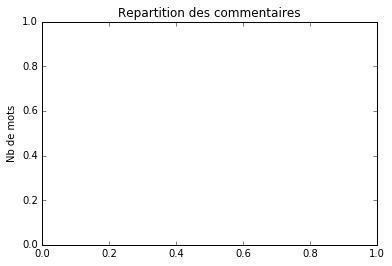

In [28]:
modifs_comments = []
#modifs_stats = []
for i in range(len(comments_v)-1):
    #ajout = list(set(comments_v[i+1])- set(comments_v[i]))
    #supp = list(set(comments_v[i]) - set(comments_v[i+1]))
    commun = list(set(comments_v[i+1]) & set(comments_v[i]))
    diff = list(set(comments_v[i+1]) ^ set(comments_v[i]))
    modif = [commun, diff]
    #modif_stats = [len(ajout), len(supp), len(commun), len(diff)]
    modifs_comments.append(modif)
    #modifs_stats.append(modif_stats)

for i, v in enumerate(modifs_comments):
    print("*comparaison de version", str(i+2),"avec", str(i+1), ":") 
    print("\t-nombre de mots communs", len(v[0]))
    print("\t-nombre de mots differents", len(v[1]))
  
    


In [ ]:
### Vérifions donc la repartition des 

def show_nb_votes_by_versions(vs):
    #for k,v in vs.items():
    #    print(len(v["votes"]),"votes sur la version:" , k )
    N = len(vs)
    votes_nb = [len(v["votes"])  for v in vs.values()]
    
    plt.title("Repartition des votes simples par version")
    plt.ylabel('Nb votes')
    #pylab.xlim([0,108])
    #pylab.xlim([0,N])
    plt.plot(votes_nb,color='r')
    #votes_declares = [v["total_votes"] for v in vs.values()]
        
    #votes_declares = [len(v["total_votes"]) for v in vs.values()]
    #plt.plot(votes_declares,color='b')
    plt.show()
    
    return
show_nb_votes_by_versions(versions)

In [12]:
for i,v in enumerate(versions):
    if i == 0:
        #la version originale n'a pas de 'slug'
        print("version "+str(i),"\t|", v["title"])
        
    else:
        #les amendements (versions) ont tous le même titre mais un slug différent avec des tirets qu'on remplace par des espace
        #print("version "+str(i), v["title"], v["slug"].replace("-", " "))
        print("version "+str(i),"\t|", v["slug"].replace("-", " "))
    
    

version 0 	| Création du nouvel article L 533-4 du code de la recherche (Livre V, Titre III, Chapitre 3)
version 1 	| distinguer shs et stem ne reconnait pas les recherches interdisplinaires quelle premiere publication quelle version
version 2 	| compte rendu du groupe gouv camp article 9
version 3 	| ouvrages collectifs
version 4 	| modif du titre
version 5 	| les etudiantes et la recherche
version 6 	| ajout production scolaire
version 7 	| ajout des rapports dans la liste des formes de publication prises en charge
version 8 	| attention vous ne voyez que 50 propositions utiliser l outil de tri pour voir les plus anciennes les plus votees etc
version 9 	| taxer les grands editeurs etrangers qui profitent des investissements publics
version 10 	| pour une science ouverte l acces et l exploitation des bien communs de la connaissance ne doivent pas etre entraves
version 11 	| grande encyclopedie collaborative de la recherche scientifique
version 12 	| rattacher les publications de reche

In [ ]:
Dans un troisième temps, il faudra plonger dans le détail des auteurs
en effet un auteur a parfois fait plusieurs modifications.
* Combien d'auteur unique?
* Combien de versions par auteurs?
* Chaque auteur a-t-il un vocabulaire particulier? 
* Analyser la proximité/distance lexicale des auteurs entre eux (mots communs/mots différents)


Dans un quatrième temps, il faudra rappatrier tous les electeurs qui ont voté pour la modification de versions
* Quels sont les auteur les plus populaires en nombre de votes absolus?
* Quels sont les auteurs les plus proches (en regardant les electeurs qui ont voté pour la même personne)

